# Create a <i>reproducible research</i> chunk of code

That means we want the reader to be able to reproduce every step of the work we do. 

If our work includes the use of stochastic processes and random variables that gets tricky: how do we assure the random draw gives the same number to the user that it gave to me? That is not random! 

That becomes possible because computers are unable to poduce truly random numbers. When we ask a computer to generate a random number, it will in fact generate a "pseudo random" number. The number will be randon in the sanse that it will be some number between, for example, 0 and 1 if we ask for a **uniform random distribution** or a number near 0 if we aks for a **Gaussian distribution with mean 0**. <i> But the sequence of pseudo-random numbers that a compujter generates will depend on its **seed**: if you know the seed you know all the numbers that are "randomely" drawn</i>.  

You can read more about pseudorandom number generation in this wikipedia article https://en.wikipedia.org/wiki/Pseudorandom_number_generator

Fill in the empty cells below with code, as directed.

In [1]:
import os
import sys

# you can use the numpy library for random number generation: 
# http://docs.scipy.org/doc/numpy/reference/routines.random.html

import numpy as np

## THIS IS THE MOST IMPORTANT PIECE OF THIS CODE! 
### give numpy as seed for this code to be reproducible 
(no points if this is wrong)

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

In [2]:
np.random.seed(seed=10)

### 1. Generate random distributions. use the function 
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
### to generate 100 2-dimensional random datapoints in a gaussian distribution 

call the array ReprRand


In [3]:
ReprRand = np.random.randn(2, 100)

#### if you did this correctly the shape of ReprRand will be (2, 100)


In [4]:
# run this cell
ReprRand.shape

(2, 100)

## 2. use the same function to generate 50 more random 2x100 numpy arrays and store them in ReprRandAll, all with different mean.

np.random.randn creates a distribution with mean 0 and standard deviation 1 by default.

To obtain a gaussian distribution with a mean different than 1 using np.random.randn you must add your new mean (it is explained in the dunction documentation for which I already gave you the link)

If you want to change the standard deviation (sigma) as well you multiply the distribution by the new sigma.

You can do it in a for loop. The first line of code I included generates an array of zeros that you can fill in with your new numbers. 




In [5]:
ReprRandAll = np.zeros((50, 2, 100))
for i in range(50):
    ReprRandAll[i] = 1.5*np.random.randn(2,100) + 1.5 

## 3. now plot them: 

you can use the matplotlib library, and the function scatter(), but that would plot everything in the same color unless you ask it not to. For convenience, let's use the function plot() which by default plots lines, and tell it to plot points (in addition plot is actually more efficient, so if you have a large dataset you may want to consider using plot with points for it anyways)

https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#scatter-plots

http://matplotlib.org/users/pyplot_tutorial.html


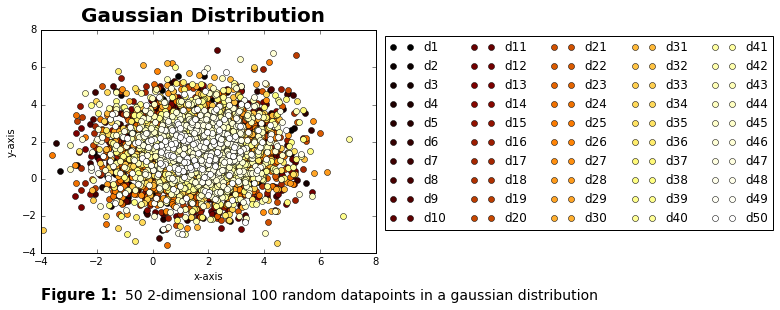

In [16]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure()
fig.suptitle('Gaussian Distribution', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.text(-4,-6.5, 'Figure 1:', fontsize = 15, fontweight = 'bold')
ax.text(-1,-6.5, '50 2-dimensional 100 random datapoints in a gaussian distribution', fontsize = 14)

colors = iter(pl.cm.afmhot(np.linspace(0,1,50)))

for i in range(50):
    label_pl = 'd' + str(i + 1)
    ax.plot(ReprRandAll[i][0],ReprRandAll[i][1],'o', label = label_pl, color = next(colors))

ax.legend(loc = 2,bbox_to_anchor=(1.01,1), ncol = 5)
        

Always add a caption to each of your homework figures. 
And remember to give your labels some names! 
This is a general rule. Without the caption or axis labels this portion of the HW will not get points. Make sure the font in the labels is large enough to be readable.  

## Figure 1: 

[write a caption here]

## Challenge

It is easier to give the same mean and standard deviation to each dimension. Can you give two different values for the mean along the x- and the mean along the y- axis for each of the 50 distributions if you have not done so? If you are an experienced coder, can you do it in a single line?




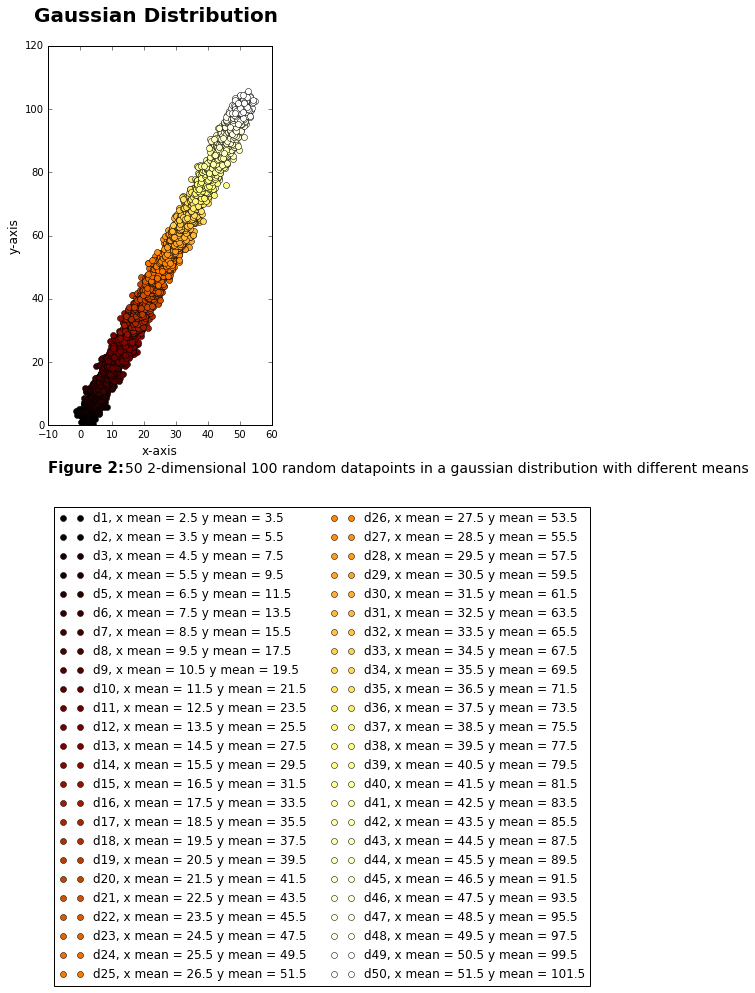

In [20]:
import matplotlib.pyplot as pl
%matplotlib inline

# the last line of code makes the plot show up within the notebook. 
# Always include it so that your homework notebooks are rendered and we can see
# what you wanted your results to be. 
fig = pl.figure( figsize=pl.figaspect(1.7) )
fig.suptitle('Gaussian Distribution', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('x-axis', fontsize = 12)
ax.set_ylabel('y-axis',  fontsize = 12)
ax.text(-10, -15, 'Figure 2:', fontsize = 15, fontweight = 'bold')
ax.text(14, -15, '50 2-dimensional 100 random datapoints in a gaussian distribution with different means', fontsize = 14)

colors = iter(pl.cm.afmhot(np.linspace(0,1,50)))

for i in range(50):
    label_pl = 'd' + str(i + 1) + ', x mean = ' + str(1.5 + (i+1)) + ' y mean = ' + str(1.5 + ((i+1)*2))
    ax.plot(ReprRandAll[i][0] + (i+1),ReprRandAll[i][1] + ((i+1)*2),'o', label = label_pl, color = next(colors))

ax.legend(loc = 2, bbox_to_anchor=(0,-0.2), ncol = 2)
        